# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Starbucks Capstone Challenge

## Project Overview

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer.

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

Example
To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

# Problem Statement

# Metrics

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


In [145]:
import pandas as pd
import numpy as np
import math
import json
# %matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [146]:
portfolio.head(2)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


In [147]:
profile.head(2)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0


In [148]:
transcript.head(2)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


# Data Exploration and Exploratory Visualization

As part of this project, before write some code or make some predictions, is neccessary understand in deep the data and all the attibutes as well as the influence between the attibutes.

In [149]:
import matplotlib.pyplot as plt

### Transactions

Now we will analyse the transactions data begining with a histogram, to check the difference about the events.

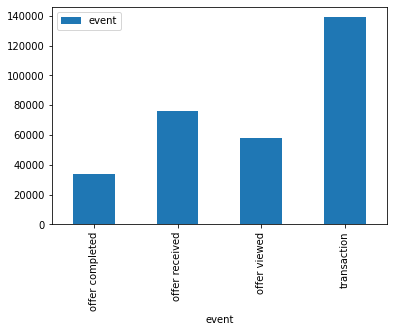

In [150]:
transcript_count_event = transcript.groupby('event').count()
transcript_count_event = transcript_count_event.drop(['value', 'time'], axis=1)
transcript_count_event = transcript_count_event.rename(columns={'person':'event'})
transcript_count_event.plot.bar()

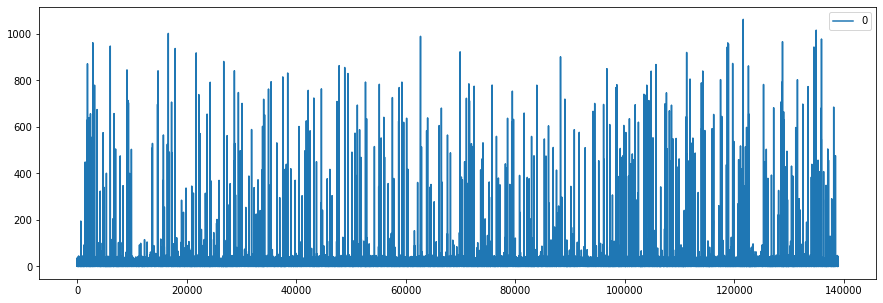

In [151]:
transcript_transaction = transcript.query("event == 'transaction'")
values = []
for value in transcript_transaction['value'].values:
    values.append(value['amount'])
transcript_value_only = pd.DataFrame(values)
transcript_value_only.plot(figsize=(15,5))

We update the data transcption with a new column of values

In [152]:
transcript_transaction.insert(2, "new_value", values)

In [155]:
# to the future, possible tests with the data
# profile_test = pd.to_datetime(profile['became_member_on'],format='%Y%m%d')

### Demographic
Analyse of the demographic data, to check the difference about the age, gender, incame and other attributes.

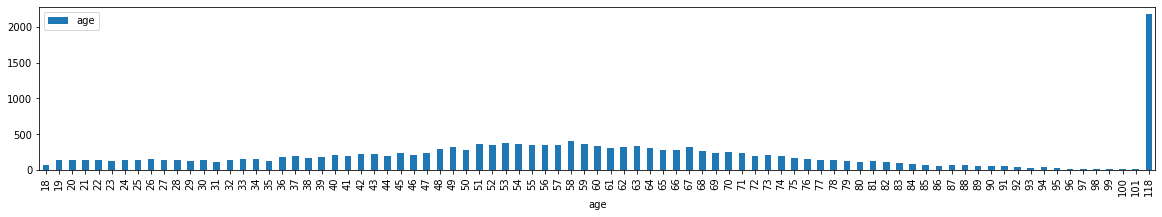

In [156]:
demographi_count_age = profile.groupby('age').count()
demographi_count_age = demographi_count_age.drop(['gender', 'became_member_on', 'income'], axis=1)
demographi_count_age = demographi_count_age.rename(columns={'id':'age'})
demographi_count_age.plot.bar(figsize=(20,3))

With the graph above we  can see that the age 118 is not correct and is out of the pattern. After remove it, we have the graph below.

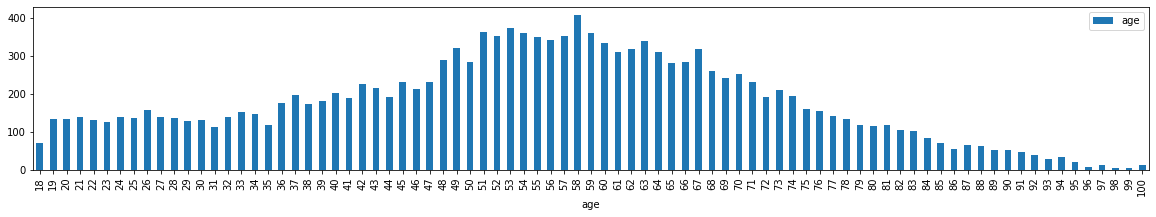

In [157]:
# Remove last element of Dataframe demographi_count and then plot the graph
demographi_count_age = demographi_count[:-1]
demographi_count_age.plot.bar(figsize=(20,3))

In [158]:
# Now we remove the age 118 from the original Dataframe profile
profile = profile.query("age != 118")

In the graph below we can visualize the proportion between the Genders

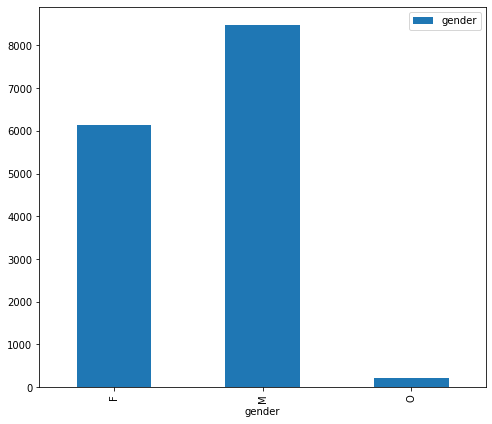

In [159]:
demographi_count_gender = profile.groupby('gender').count()
demographi_count_gender = demographi_count_gender.drop(['age', 'became_member_on', 'income'], axis=1)
demographi_count_gender = demographi_count_gender.rename(columns={'id':'gender'})
demographi_count_gender.plot.bar(figsize=(8,7))

In the graph below we can visualize the proportion between the Incomes

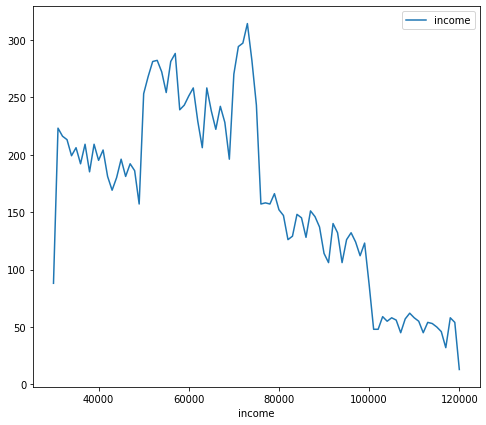

In [160]:
demographi_count_income = profile.groupby('income').count()
demographi_count_income = demographi_count_income.drop(['age', 'became_member_on', 'gender'], axis=1)
demographi_count_income = demographi_count_income.rename(columns={'id':'income'})
demographi_count_income.plot(figsize=(8,7))

### Portifolio Offers

Analyse of the offers data. Here we  have just 10  elements, thus we didn't need to plot any graphp because it is easy to visualize all of them.

In [161]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


# Algorithms and Techniques

Here we  will discuss about the Artificial Neural Network (ANN) and how we can use it in our project.

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

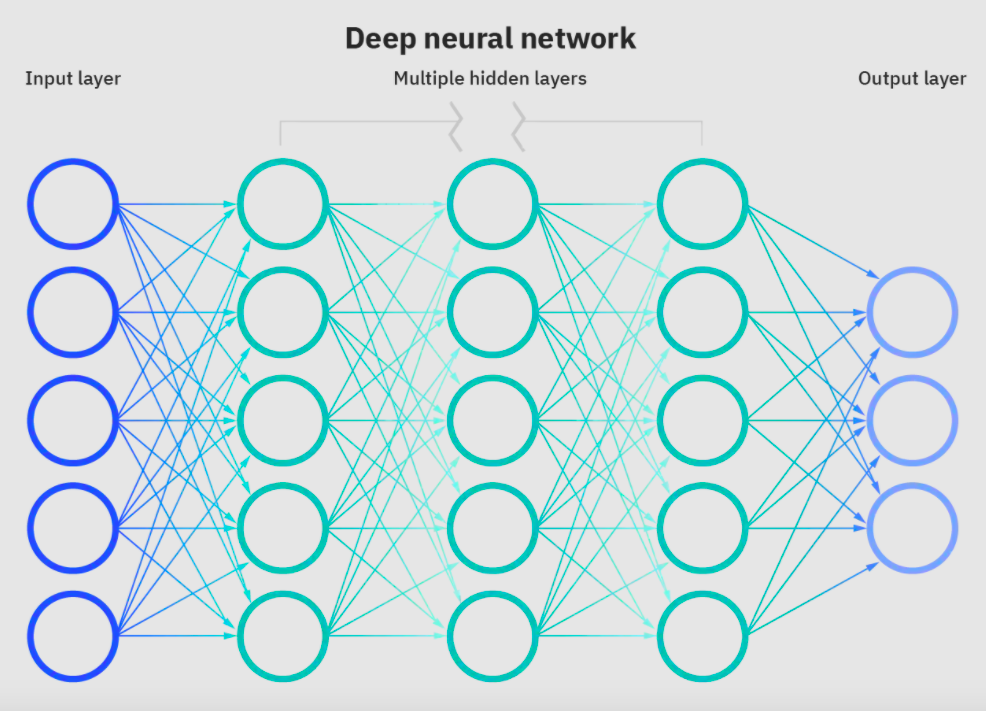

In [162]:
from IPython import display
display.Image("./ann.png")

Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.



A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

In our project we eill use the library Pytorch

Neural networks can be constructed using the torch.nn package.

An nn.Module contains layers, and a method forward(input) that returns the output.


Another techniques releted to Dataset Preparation going to also be made before runing the ANN algorithm.

# Benchmark

To have some paraters and define a border to our performance, we search at the literature limilar works. 

Stubseid and Arandjelovic (2018) studied about how consumers make decisions before to buy a product.

Using a large real world data set, they present a series of experiments, analyse and compare the performances of different machine learning techniques, and discuss the significance of the findings in the context of public policy
and consumer education. As the result of their work, there are the tables bellow:

The figure below shows the instance structure used in their work

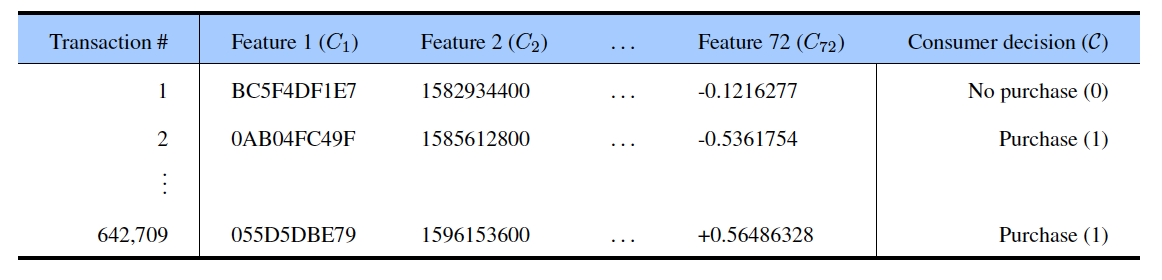

In [163]:
display.Image("./paper1.png")

The figure below shows the results obtained in their work

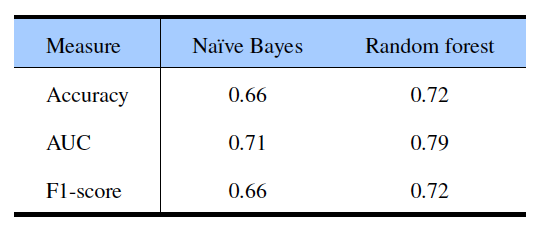

In [164]:
display.Image("./paper2.png")

Although the dataset used by Stubseid and Arandjelovic (2018) being different from the dataset used in this work, we can measure and hope how good our perfamance can being. 

# Data Preprocessing

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, lacking in certain behaviors or trends, and is likely to contain many errors.

Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.
Data preprocessing is used in database-driven applications such as customer relationship management and rule-based applications (like neural networks).
In Machine Learning (ML) processes, data preprocessing is critical to encode the dataset in a form that could be interpreted and parsed by the algorithm.



For example, when we remove the age 118 from the dataset profile.json, we made our first Preprocessing in our data. But some other manipultation is necessary yet before runing the algorithm.

Firstly we will mixing all data in just one file Pandas Dataframe.

In [226]:
import numpy as np

In [253]:
profile_np = profile.to_numpy()
profile_np[2][2]
oi = np.argwhere(profile_np == '0610b486422d4921ae7d2bf64640c50b')

In [257]:
tt= profile_np[oi[0][0]].tolist()

In [258]:
t = transcript.values.tolist()[0]

In [259]:
t.append(tt[0])
t.append(tt[1])
t.append(tt[2])
t.append(tt[4])

In [260]:
t

['78afa995795e4d85b5d9ceeca43f5fef',
 'offer received',
 {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},
 0,
 'F',
 55,
 '0610b486422d4921ae7d2bf64640c50b',
 112000.0]

In [262]:
profile_np = profile.to_numpy()
def get_profile_by_id(id):
    return np.argwhere(profile_np == id)


In [274]:

def mix_transcript_profile(profile, transcript):
    new_transcript = []
    for i in transcript.values.tolist():
        
        # get profile from transcript item
        profile_item = get_profile_by_id(i[0])
        if(len(profile_item) > 0):
            #add profile item into transcript item
            tt = profile_np[profile_item[0][0]].tolist()
            i.append(tt[0])
            i.append(tt[1])
            i.append(tt[2])
            i.append(tt[4])

            # add transcript item into new transcript
            new_transcript.append(i)
        
    return new_transcript

In [280]:
%%time
profile_transcript = mix_transcript_profile(profile, transcript)

CPU times: user 11min 16s, sys: 2.35 s, total: 11min 18s
Wall time: 11min 24s


In [279]:
transcript.shape

(306534, 4)

In [273]:
transcript_part

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
95,7c8479d8241344f6a0c306621e191c75,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
96,5404741ead9442bdbd4b9aa2273e85af,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
97,81e9ad5fa55a4884b65e01a5db8f1b4e,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
98,ed46fca6de7042478b411690878dc069,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0


https://www.ibm.com/cloud/learn/neural-networks
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
https://www.techopedia.com/definition/14650/data-preprocessing